In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from matplotlib import cm
from scipy.linalg import issymmetric
import networkx as nx

from functions import *

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

This network was constructed from the USA's FAA (Federal Aviation Administration) National Flight Data Center (NFDC), Preferred Routes Database. Nodes in this network represent airports or service centers and links are created from strings of preferred routes recommended by the NFDC.

In [2]:
RM = nx.read_weighted_edgelist('./networks/road-chesapeake.mtx', 
                               comments='%', create_using=nx.DiGraph)

/tmp/ipykernel_22518/3168154972.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(RM); A = A.toarray()


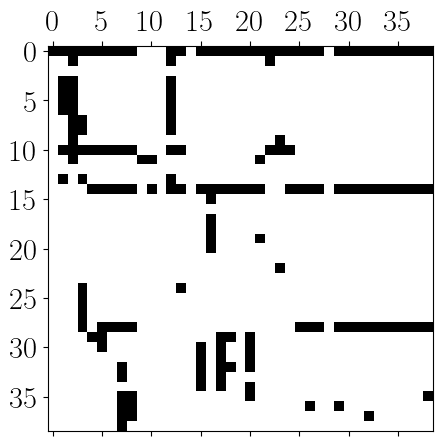

In [3]:
# retrieve adjacency matrix
A = nx.adjacency_matrix(RM); A = A.toarray()

# visualising
plt.figure(figsize=(5,5))
plt.spy(A)

In [4]:
issymmetric(A)

False

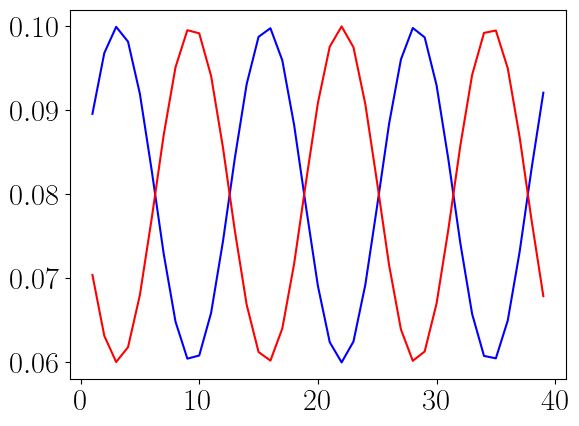

In [18]:
# Setup
nodes = np.arange(1,len(RM)+1)

# Brusselator parameters
#D = [1, 7]
#wave1 = 1 + 0.9*np.sin(nodes)
#wave2 = 2 - wave1

# Mimura-Murray parameters
#D = [1, 0.0125]
#wave1 = np.maximum(5, 10 - np.abs(nodes - len(RM)/2))
#wave2 = wave1 + 5

# Fitzhugh-Nagumo parameters
D = [0.2, 15]
wave1 = 0.08 + 0.02*np.sin(nodes/2)
wave2 = 0.16 - wave1

init = np.hstack(( wave1, wave2 ))
tspan = np.arange(0,20,0.001)
plt.plot(nodes,wave1,'b')
plt.plot(nodes,wave2,'r')

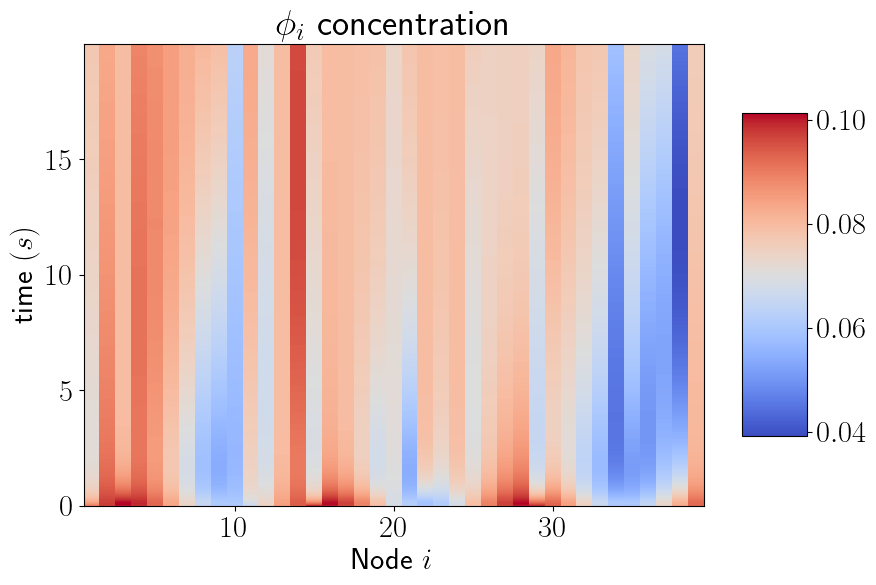

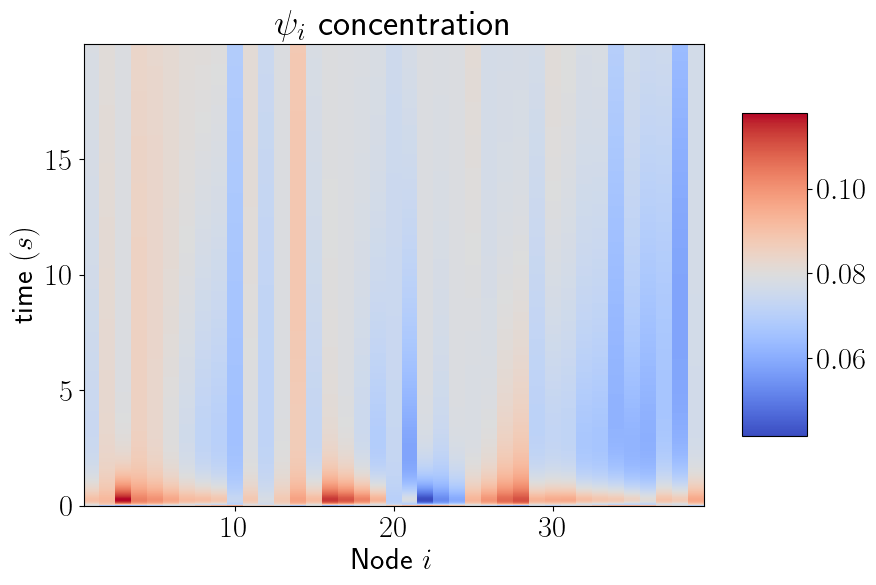

In [21]:
# simulating
sol = simulate_rdm(A, FitzhughNagumo, D, init, tspan, 0)

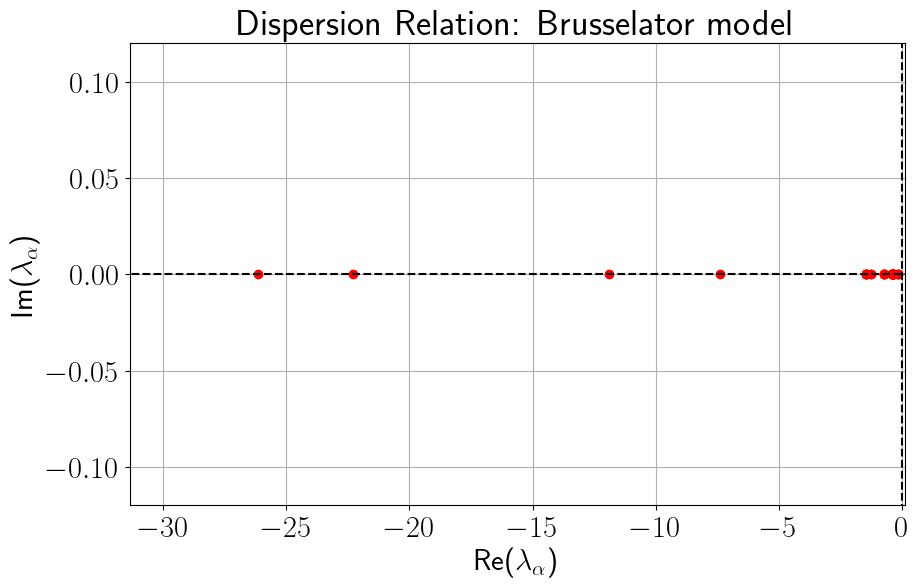

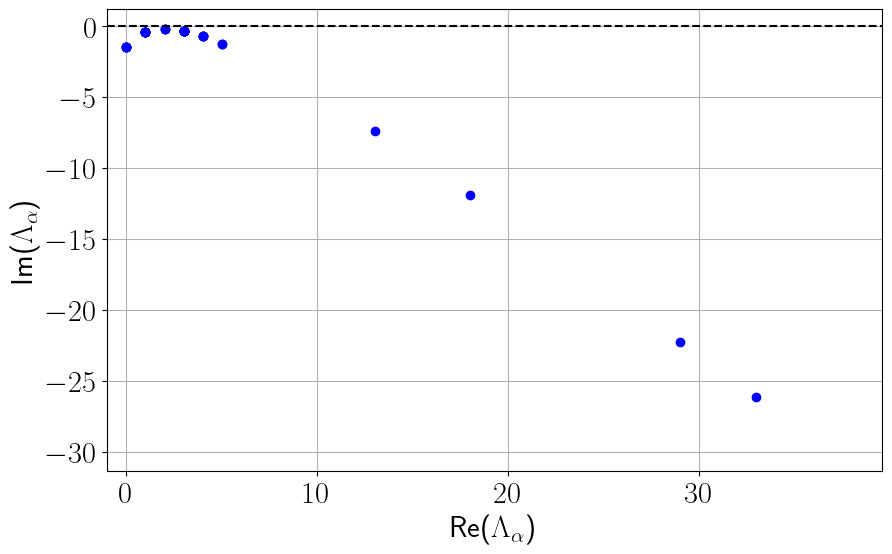

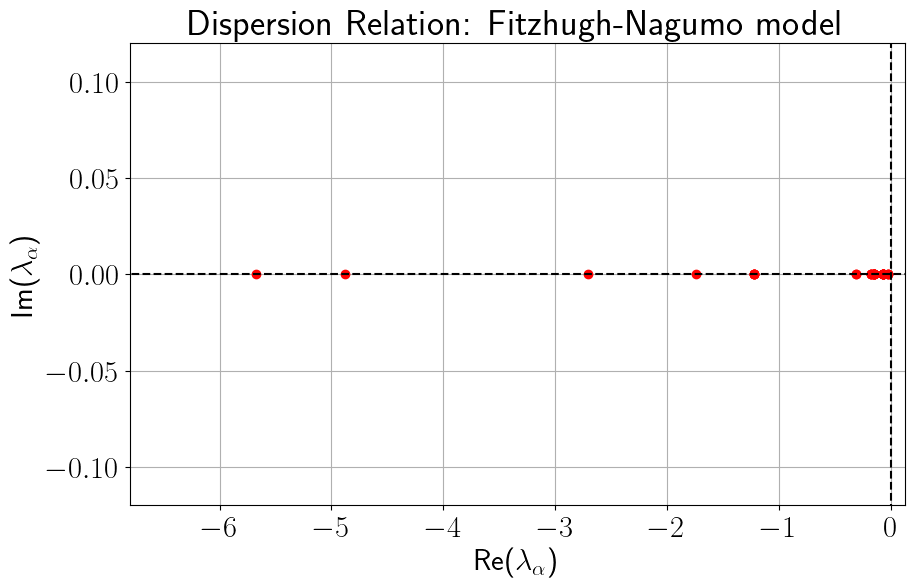

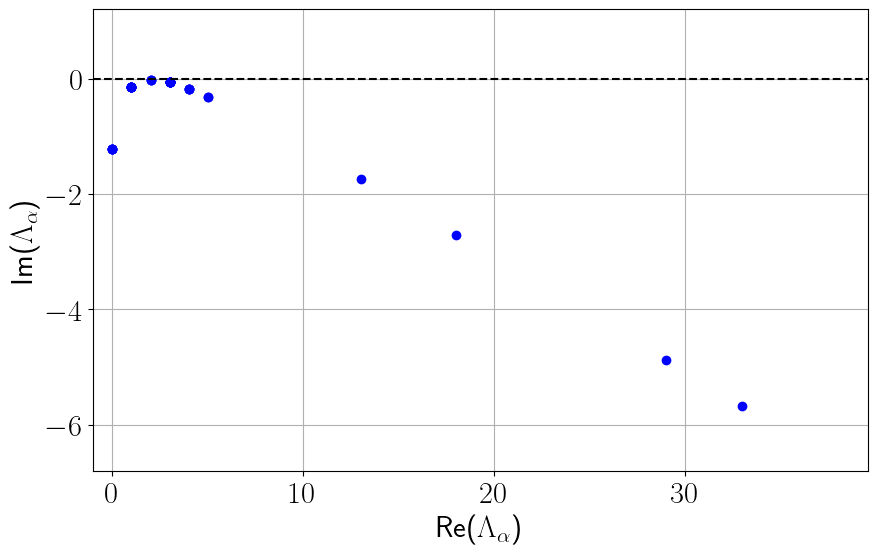

In [20]:
br = dispersion_relation(A,'Brusselator')
fn = dispersion_relation(A,'Fitzhugh-Nagumo')
#mm = dispersion_relation(A,'Mimura-Murray')